# 04 - Functions: Gases
Functions are used all the time and are a way to organize code. They are an efficient way to use the computer to repeat calculations with slight variations. Multiple examples are given here of functions you'll use in your educational and professional career.

## Equations of State: Ideal Gas
Equations of state relate the pressure, temperature, and molar volume of a fluid mathematically.  These are used in almost every discipline of engineering problems chemical engineers face.  The ideal gas law is the simplest equation of state: 

$$
P = \frac{nRT}{V} = \frac{RT}{\tilde{V}}
$$

where $P$ is pressure, $R$ is the gas constant, $T$ is temperature, and $\tilde{V}$ is the molar volume (volume of gas divided by the moles of gas).  The molar volume is the volume of one mole of a substance.  The ideal gas law is a good approximation for many gases at low pressures and high temperatures.  

In [1]:
#define the function that returns the pressure depending on the temperature (Kelvin) and molar volume (m^3/mol)
def pressure_IG(T,mV): #this function takes two inputs: temperature and molar volume
    Rg = 8.314 #universal gas constant in J/mol/K
    return Rg*T/mV #this is where the pressure is calculated and returned in units of Pa

### Calculate the Pressure using Our Function

Now we can use this function to calculate the pressure of 1 mole of an ideal gas at 300 K and 1 L.  We'll use the print function to print the result to the screen.

In [2]:
#Making sure my units are consistent:
Vol = 1*0.001 #1 Liter = 0.001 m^3
nmol = 1 #1 mole of gas
#call the function then print the result
print(f'The pressure in a 1 Liter vessel with 1 mole of gas inside is {pressure_IG(300,Vol/nmol):.0f} Pa') 

The pressure in a 1 Liter vessel with 1 mole of gas inside is 2494200 Pa


### Course Outcome:
- Students will be able to convert problem solving strategies to **procedural algorithms**, and 
- make **order of magnitude estimates**, assess reasonableness of solutions, and select appropriate levels of solution sophistication

**Classroom demo and Group exercise**: Estimate the number of moles inside a balloon of the size shown in class. The pressure inside a balloon is approximately 0.75 psi. Make a function and then use it to calculate the number of moles of air inside the balloon.

### Plot of the Pressure vs Molar Volume for an Ideal Gas
We'll use our function to create a plot of the pressure vs molar volume for an ideal gas at different temperatures.

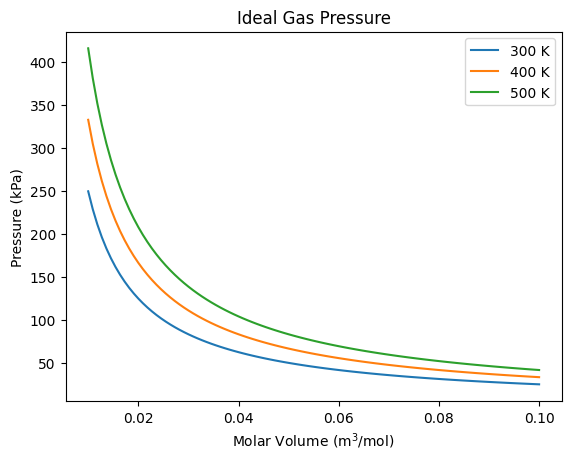

In [3]:
import numpy as np #import the numpy library
import matplotlib.pyplot as plt #import the matplotlib library for plotting (also check out seaborn)
mVols = np.linspace(0.01,0.1,100) #create an array of molar volumes 
temps = [300,400,500] #create a list of temperatures in Kelvin
for each in temps:
    plt.plot(mVols,pressure_IG(each,mVols)/1000,label=f'{each} K') #plot the pressure as a function of molar volume
plt.title('Ideal Gas Pressure') #add a title to the plot
plt.xlabel('Molar Volume (m$^3$/mol)') #label the x-axis
plt.ylabel('Pressure (kPa)') #label the y-axis
plt.legend(); plt.show() #show the legend and the plot

This plot shows that as the volume decreases for a given amount of gas, the pressure increases. The pressure also increases with temperature. We'll see shortly that a virial or cubic equation of state is a better model and shows the two phase region.

### Calculate the Number of Moles given a Pressure and Temperature

> What if we wanted to calculate how many moles of gas are in the classroom? 
>
> One way is to create another function with the ideal gas law rearranged to return the number of moles of gas.
> Another way is to use the existing function and set the pressure to the room pressure and solve for the number of moles of gas.

In keeping with our theme of introducing upcoming concepts when we're learning about a related topic, we'll introduce the **fsolve** method that we'll learn more about in a couple weeks. 

In [4]:
# Lets solve for the molar volume of an ideal gas at a given pressure and temperature
# First, we'll import the solver from scipy
from scipy.optimize import fsolve
#now we'll solve for the molar volume of an ideal gas at a given pressure and temperature
classroomV = 60*45*10/(3.281**3) #60 ft x 45 ft x 10 ft multiplied by our conversion factor to get m3
classroomP = 85e3 #approximately 85 kPa at our elevation
classroomT = 295 #approximately 72 F to C to Kelvin
molarVolume = fsolve(lambda mV: pressure_IG(classroomT,mV)-classroomP, 1) #fsolve(function=0 with variable listed first, initial guess)
print(f'The molar volume of an ideal gas at {classroomP/1000:.0f} kPa and {classroomT:.0f} K is {molarVolume[0]:.3f} m3/mol')
print(f'The number of moles of gas in the room is {classroomV/molarVolume[0]:.0f}')

The molar volume of an ideal gas at 85 kPa and 295 K is 0.029 m3/mol
The number of moles of gas in the room is 26493


In [5]:
#Lets check our answer: (PV/RT = n)
classroomP*classroomV/(8.314*classroomT)

26493.050209974554

The lambda function defines the independent variable 'mV' and then uses that with the 'pressure_IG' function with a guess value of 1 for the molar volume. The lambda function sets the output of the pressure_IG function to the classroom pressure and the fsolve finds the value of mV that satisfies that condition (the pressure equaling the classroom pressure). The lambda function's use in the fsolve is particularly useful when the function has more than one variable.

```{note}
Let's do this a different way (any program can be completed any number of ways). Lets make a more general program that will return the value that we don't give it.
```

In [6]:
def idealgas(P=None,T=None,mV=None):
    Rg = 8.314  # universal gas constant in J/mol/K
    if P is None:
        # since p wasn't specified, we'll calculate it and return it
        # but since we don't know if the other two parameters are specified, we'll try to 
        try: #return pressure
            return T/mV*Rg
        except:
            print('Not enough information for calculation')
    elif T == None: #return temperature
        try:
            return P*mV/Rg
        except:
            print('Not enough information for calculation')
    elif mV == None: #return molar volume
        try:
            return Rg*T/P
        except:
            print('Not enough information for calculation')

In [7]:
#now we'll use this function several times to make sure it works
print(f'The pressure in a 1 Liter vessel with 1 mole of gas inside is {idealgas(T=300,mV=Vol/nmol):.0f} Pa')
print(f'The moles of an ideal gas at {classroomP/1000:.0f} kPa and {classroomT:.0f} K inside the classroom is {classroomV/idealgas(P=classroomP,T=classroomT):.0f} mol')

The pressure in a 1 Liter vessel with 1 mole of gas inside is 2494200 Pa
The moles of an ideal gas at 85 kPa and 295 K inside the classroom is 26493 mol


Great, we got the same answers as before for both scenarios. Let's see if we don't define enough variables.

In [8]:
idealgas(T=300)

Not enough information for calculation


## Equation of State: van der Waals

The van der Waals equation of state is a more complex equation of state that accounts for non-ideal behavior of gases.  The van der Waals equation of state is given by:

$$
\begin{equation}
P = \frac{RT}{\tilde{V} - b} - \frac{a}{\tilde{V}^2}
\end{equation}
$$

where $a$ and $b$ are constants that depend on the gas.  The constants for several compounds are in the below table:
|Compound|a (L^2 bar/mol^2)|b (L/mol)|
|---|---|---|
|oxygen|1.382|0.03186|
|methane|2.283|0.04278|
|water|5.536|0.03049|


```{note}
The van der Waals EOS was one of the first cubic equations of state. There are more accurate relationships that are used in practice today. You'll notice that for a given pressure, there can be multiple volumes that satisfy the equation. This is because the EOS is cubic and has three roots. The largest root is the physical root defining the gas phase and the lowest root is the physical root defining the liquid phase. The middle root is the unstable root and is not physical. 
```
```
```

In [9]:
def P_vdW(T,mV,a,b):
    Rg = 8.314  # universal gas constant in J/mol/K
    return Rg*T/(mV-b)-a/mV**2

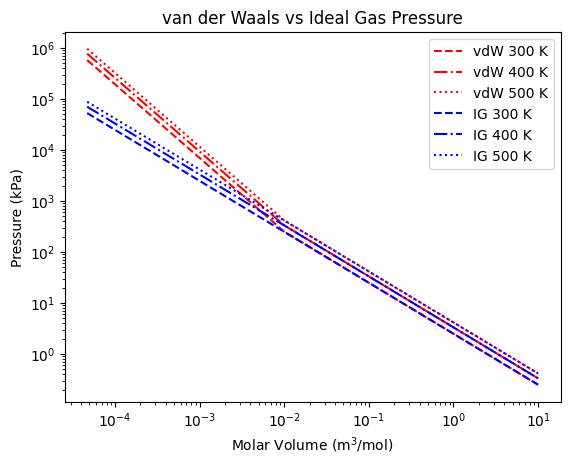

In [10]:
#we'll also plot the pressure as a function of molar volume for the van der Waals equation for methane
aCH4 = 2.283/1000 #van der Waals a parameter for methane in Pa m^6/mol^2
bCH4 = 0.04278/1000 #van der Waals b parameter for methane in m^3/mol
mVols = np.linspace(bCH4*1.1,10,1000) #create an array of molar volumes
styles = ['--','-.',':'] #create a list of line styles
for i,each in enumerate(temps):
    plt.plot(mVols,P_vdW(each,mVols,aCH4,bCH4)/1000,'r'+styles[i],label=f'vdW {each} K') #plot the pressure as a function of molar volume
for i,each in enumerate(temps):
    plt.plot(mVols,pressure_IG(each,mVols)/1000,'b'+styles[i],label=f'IG {each} K') #plot the pressure as a function of molar volume
plt.title('van der Waals vs Ideal Gas Pressure') #add a title to the plot
plt.xlabel('Molar Volume (m$^3$/mol)') #label the x-axis
plt.ylabel('Pressure (kPa)') #label the y-axis
plt.yscale('log');plt.xscale('log') #set the y-axis to a log scale
plt.legend(); plt.show() #show the legend and the plot

Here in the log-log plot, the van der Waals EOS agrees with the ideal gas result at pressures below about 1000 kPa (100 bar). Above those pressues, the van der Waals predicts a significantly high pressure than the ideal gas law. 

## Classes and Objects
Classes and objects are used so frequently in the programming of commercial software. You'll use objects (an instance of a class) when you write efficient code where you don't have code blocks that repeat. In that way, classes are similar to functions.

Classes and objects are appropriate to use when have multiple similar scenarios that require similar definitions and methods. For example, you may have multiple tanks than each have a maximum capacity and whose current liquid mass varies depending on the geometry such as a cylindrical or square tank. You can define a class for a tank and then create objects for each tank. The class defines the attributes and methods for the tank and the objects are the individual tanks.

In the [motivation lecture](01-Motive.ipynb), we setup a class with properties and a method to easily specify different gas species with a method to calculate the ideal gas heat capacity with the properties of each gas object (instance). Here we'll work with some tanks.

In [11]:
import param #import the param library to easily instantiate a class with defined parameters
class tank(param.Parameterized):
    maxCapacity = param.Number(1000,bounds=(0,None),doc='Maximum capacity of the tank in cubic meters')
    shape = param.String('cylinder',doc='Shape of the tank')
    diameter = param.Number(1,bounds=(0,None),doc='Diameter of the tank in meters')
    level = param.Number(1,bounds=(0,None),doc='Level of the fluid in the tank in meters')

    def fluidvolume(self): #in cubic meters
        if self.shape == 'cylinder':
            return np.pi*self.diameter**2/4*self.level
        elif self.shape == 'sphere':
            return (np.pi*self.level**2)/3*(3*self.diameter/2-self.level)
        elif self.shape == 'cone':
            return np.pi*self.diameter**2/12*self.level

### Example problem with tank objects
**Problem Statement:** There are 5 tanks that are spherical, 3 cylindrical tanks, and 4 conical tanks. The three spherical tanks have levels of 2.5, 3.0, 2.6, 3.2, and 3.5 m. The cylindrical tanks have levels of 1.5, 2.0, and 2.5 m. The conical tanks have levels of 1.0, 1.5, 2.0, and 2.5 ft. The tanks have a diameter of 2 m, except for the spherical tanks that have a diameter of 5 m. The tanks are filled with biodiesel. Calculate the total volume in the tanks for inventory purposes.

In [12]:
#First setup the tank objects
#spherical tanks
sphlevels = [2.5,3,2.6,3.2,3.5] #in meters
sphtanks = [tank(shape='sphere',diameter=5,level=sphlevels[i]) for i in range(len(sphlevels))]

#cylindrical tanks
cyllevels = [1.5,2,2.5] #in meters
cyltanks = [tank(shape='cylinder',diameter=2,level=cyllevels[i]) for i in range(len(cyllevels))]

#conical tanks
conelevels = np.array([1,1.5,2,2.5])/3.281 #in meters
conetanks = [tank(shape='cone',diameter=2,level=conelevels[i]) for i in range(len(conelevels))]

#Now calculate the total volume of fluid in the tanks
totalvolume = 0
for each in sphtanks:
    totalvolume += each.fluidvolume()
for each in cyltanks:
    totalvolume += each.fluidvolume()
for each in conetanks:
    totalvolume += each.fluidvolume()
print(f'The total volume of fluid in the tanks is {totalvolume:.2f} m3')


The total volume of fluid in the tanks is 228.33 m3


In [13]:
sphtanks

[tank(diameter=5, level=2.5, maxCapacity=1000, name='tank00002', shape='sphere'),
 tank(diameter=5, level=3, maxCapacity=1000, name='tank00003', shape='sphere'),
 tank(diameter=5, level=2.6, maxCapacity=1000, name='tank00004', shape='sphere'),
 tank(diameter=5, level=3.2, maxCapacity=1000, name='tank00005', shape='sphere'),
 tank(diameter=5, level=3.5, maxCapacity=1000, name='tank00006', shape='sphere')]

In [14]:
# You can access the parameters of the class by calling the class name and the parameter name
print(f'The level in the first spherical tank is {sphtanks[0].level} m')

The level in the first spherical tank is 2.5 m


This example may seem complex, but using and being familiar with objects is important. You'll work with objects all the time when you're programming. A simple example is a list. Lists are objects that have methods. A method you can call on a python list is the append method. The append method adds an element to the end of the list.

In [15]:
#for example, we can append another tank to our spherical tank list
sphtanks.append(tank(shape='sphere',diameter=5,level=2.8))
sphtanks

[tank(diameter=5, level=2.5, maxCapacity=1000, name='tank00002', shape='sphere'),
 tank(diameter=5, level=3, maxCapacity=1000, name='tank00003', shape='sphere'),
 tank(diameter=5, level=2.6, maxCapacity=1000, name='tank00004', shape='sphere'),
 tank(diameter=5, level=3.2, maxCapacity=1000, name='tank00005', shape='sphere'),
 tank(diameter=5, level=3.5, maxCapacity=1000, name='tank00006', shape='sphere'),
 tank(diameter=5, level=2.8, maxCapacity=1000, name='tank00014', shape='sphere')]